<a href="https://colab.research.google.com/github/rezkydp/Percobaan-Ke-2/blob/main/Regresi_Kecerdasan_Buatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv')
data.head

<bound method NDFrame.head of     sqft_living  sqft_living15  sqft_above     price
0          1180           1340        1180  221900.0
1          2570           1690        2170  538000.0
2           770           2720         770  180000.0
3          1960           1360        1050  604000.0
4          1680           1800        1680  510000.0
..          ...            ...         ...       ...
95         3300           1950        2390  905000.0
96         1960           1750        1960  247500.0
97         1160           1160        1160  199000.0
98         1810           1650        1210  314000.0
99         2320           2550        2320  437500.0

[100 rows x 4 columns]>

In [3]:
data.corr()

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


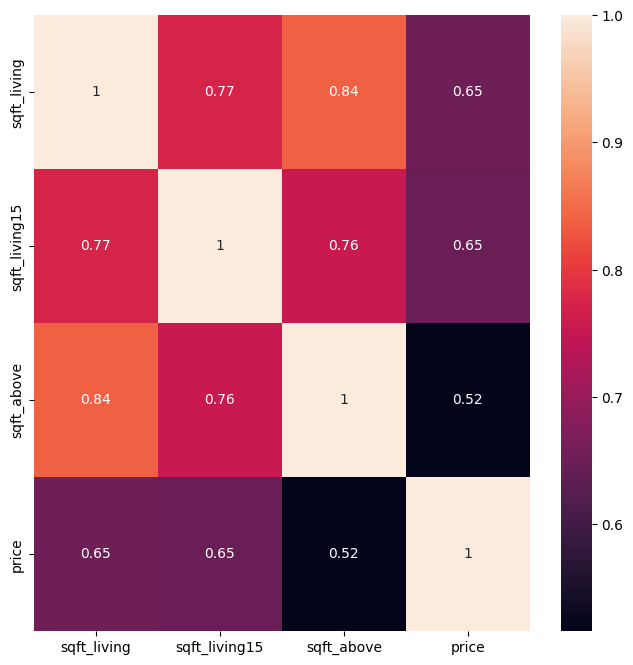

In [4]:
# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [5]:
X = data.iloc[:, 1:-1]
Y = data.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
print("Ukuran training dan testing data:")
print("Training datasate:",X_train.shape, Y_train.shape)
print("Testing datasate:",X_test.shape, Y_test.shape)

Ukuran training dan testing data:
Training datasate: (80, 2) (80,)
Testing datasate: (20, 2) (20,)


In [7]:
LinearReg = LinearRegression().fit(X_train, Y_train)
LassoReg = Lasso(alpha=0.1).fit(X_train, Y_train)
RidgeReg = Ridge(alpha=0.1).fit(X_train, Y_train)
SVRReg = SVR().fit(X_train, Y_train)
DTReg = DecisionTreeRegressor(random_state=47).fit(X_train, Y_train)

In [8]:
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

ypredtrain_svr = SVRReg.predict(X_train)
ypredtest_svr = SVRReg.predict(X_test)

ypredtrain_dt = DTReg.predict(X_train)
ypredtest_dt = DTReg.predict(X_test)

In [9]:
print('Nilai MSE data training Regresi Linier =', mean_squared_error(Y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier =', mean_squared_error(Y_test, ypredtest_reglin), '\n')

print('Nilai MSE data training Regresi Lasso =', mean_squared_error(Y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso =', mean_squared_error(Y_test, ypredtest_lasso), '\n')

print('Nilai MSE data training Regresi Ridge =', mean_squared_error(Y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge =', mean_squared_error(Y_test, ypredtest_ridge), '\n')

print('Nilai MSE data training Regresi SVR =', mean_squared_error(Y_train, ypredtrain_svr))
print('Nilai MSE data testing Regresi SVR =', mean_squared_error(Y_test, ypredtest_svr), '\n')

print('Nilai MSE data training Regresi DTR =', mean_squared_error(Y_train, ypredtrain_dt))
print('Nilai MSE data testing Regresi DTR =', mean_squared_error(Y_test, ypredtest_dt), '\n')

Nilai MSE data training Regresi Linier = 56997297057.82163
Nilai MSE data testing Regresi Linier = 41476116235.20242 

Nilai MSE data training Regresi Lasso = 56997297057.82163
Nilai MSE data testing Regresi Lasso = 41476116207.508804 

Nilai MSE data training Regresi Ridge = 56997297057.82163
Nilai MSE data testing Regresi Ridge = 41476116213.10277 

Nilai MSE data training Regresi SVR = 113674157081.88974
Nilai MSE data testing Regresi SVR = 37393688239.0868 

Nilai MSE data training Regresi DTR = 455625000.0
Nilai MSE data testing Regresi DTR = 63963238505.0 



In [10]:
print(f'R^2 score data training Regresi Linier = {LinearReg.score(X, Y)}')
print(f'R^2 score data testing Regresi Lasso = {LassoReg.score(X, Y)}')
print(f'R^2 score data training Regresi Ridge = {RidgeReg.score(X, Y)}')
print(f'R^2 score data testing Regresi SVR = {SVRReg.score(X, Y)}')
print(f'R^2 score data training Regresi DTR = {DTReg.score(X, Y)}')

R^2 score data training Regresi Linier = 0.41289167960209994
R^2 score data testing Regresi Lasso = 0.41289167966243856
R^2 score data training Regresi Ridge = 0.4128916796502504
R^2 score data testing Regresi SVR = -0.07216147850842747
R^2 score data training Regresi DTR = 0.856666688439627


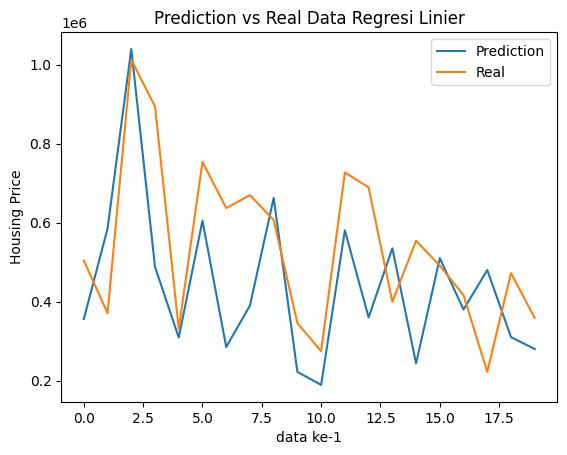

In [11]:
plt.plot(Y_test.values)
plt.plot(ypredtest_reglin)
plt.title('Prediction vs Real Data Regresi Linier')
plt.xlabel("data ke-1")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction',"Real"])
plt.show()

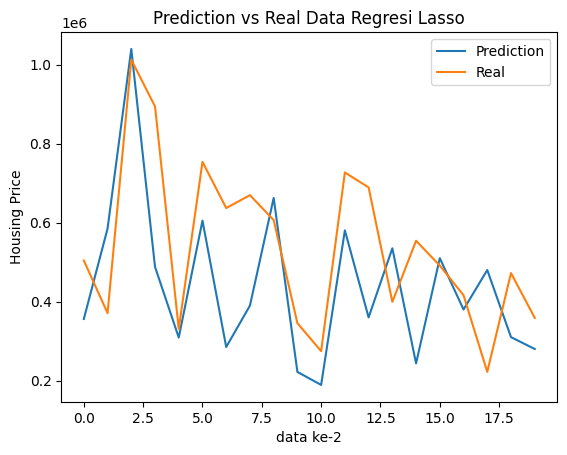

In [12]:
plt.plot(Y_test.values)
plt.plot(ypredtest_lasso)
plt.title('Prediction vs Real Data Regresi Lasso')
plt.xlabel("data ke-2")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction',"Real"])
plt.show()

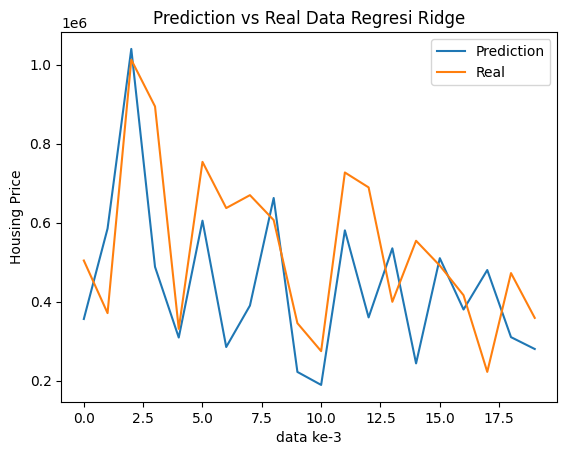

In [13]:
plt.plot(Y_test.values)
plt.plot(ypredtest_ridge)
plt.title('Prediction vs Real Data Regresi Ridge')
plt.xlabel("data ke-3")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction',"Real"])
plt.show()

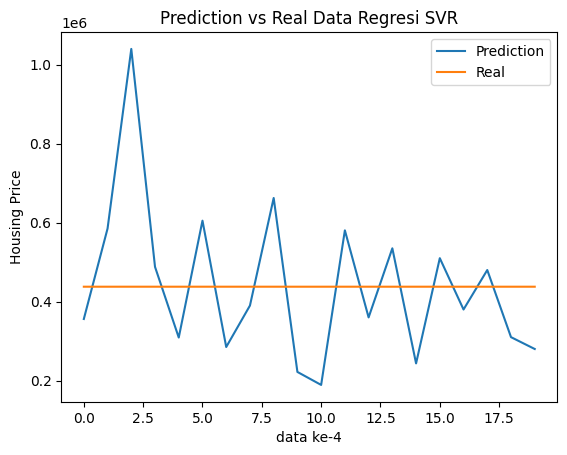

In [14]:
plt.plot(Y_test.values)
plt.plot(ypredtest_svr)
plt.title('Prediction vs Real Data Regresi SVR')
plt.xlabel("data ke-4")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction',"Real"])
plt.show()

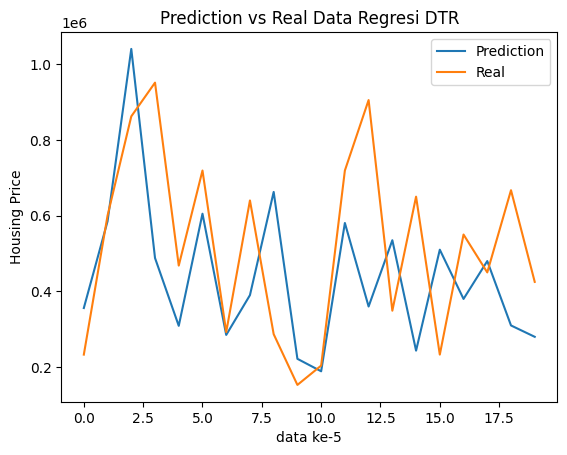

In [15]:
plt.plot(Y_test.values)
plt.plot(ypredtest_dt)
plt.title('Prediction vs Real Data Regresi DTR')
plt.xlabel("data ke-5")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction',"Real"])
plt.show()

In [ ]:
sqft_living = float(input('Input SQFT Living \t= '))
sqft_living15 = float(input('Input SQFT Living 15 \t= '))
sqft_above = float(input('Input SQFT Above \t= '))
data_baru = [[sqft_living, sqft_living15, sqft_above]]

hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

print('\nPrediksi Housing Price', hasil_prediksi)